# Regression - Visualizations
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as manim
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import imageio as iio

from regression__utils import *

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

## 1. Linear Regression
---
### 1.1. Simple
---

In [3]:
class linearRegression_simple(object):
    def __init__(self):
        self._m = 0
        self._b = 0
    @property
    def m(self):
        return self._m
    @property
    def b(self):
        return self._b
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        X_ = X.mean()
        y_ = y.mean()
        num = ((X - X_)*(y - y_)).sum()
        den = ((X - X_)**2).sum()
        self._m = num/den
        self._b = y_ - self._m*X_
    def pred(self, x):
        x = np.array(x)
        return self._m*x + self._b

In [4]:
lrs = linearRegression_simple()

In [5]:
# Synthetic data 1
x, yA, yB, yC, yD = synthData1()

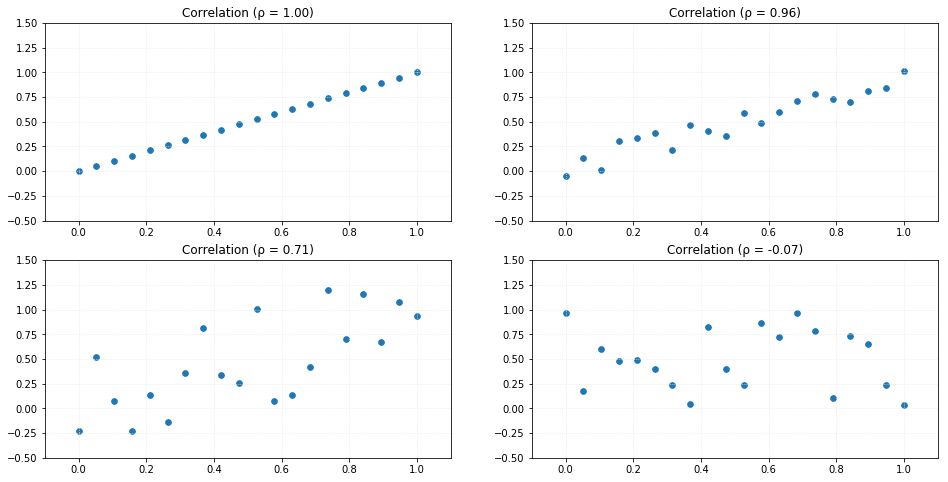

Wall time: 885 ms


In [6]:
%%time
def cellPlot(ax, x, y, lrs):
    ax.scatter(x, y, 32)
    ax.set_title('Correlation (ρ = {0:.2f})'.
                 format(correlation(x, y)))
    ax.grid(color = '0.9', linestyle = ':')
    ax.axis([-0.1, 1.1, -0.5, 1.5])

fig, [[axA, axB], [axC, axD]] = plt.subplots(2, 2)

cellPlot(axA, x, yA, lrs)
cellPlot(axB, x, yB, lrs)
cellPlot(axC, x, yC, lrs)
cellPlot(axD, x, yD, lrs)

fig.savefig('output/regression_linear_correlation.png', tight_layout=True)
plt.show()

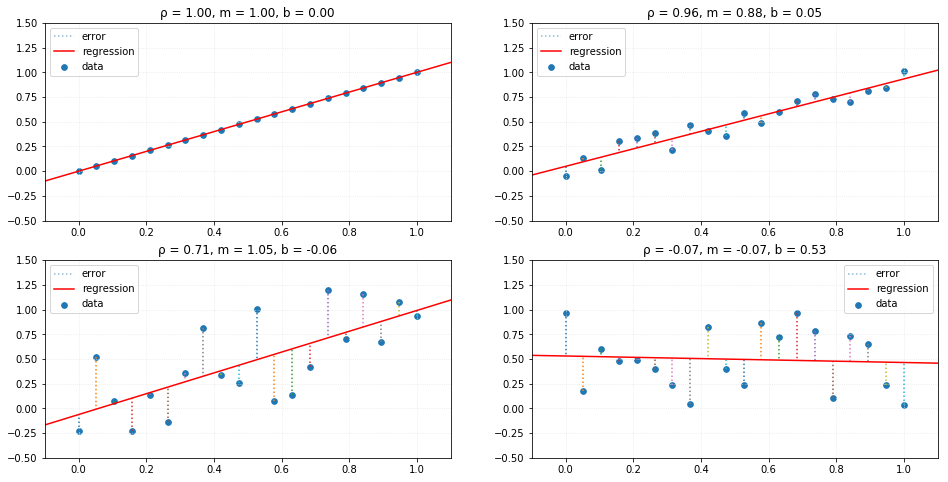

Wall time: 1.08 s


In [7]:
%%time
def cellPlot(ax, x, y, lrs):
    ax.scatter(x, y, 32, label='data')
    ax.plot([x, x], [y, lrs.pred(x)], ':')
    ax.plot(0, 0, ':', alpha=0.5, label='error')
    ax.plot([-5, 5], lrs.pred([-5, 5]), color='red', label='regression')
    ax.set_title('ρ = {0:.2f}, m = {1:.2f}, b = {2:.2f}'.
                 format(correlation(x, y), lrs.m, lrs.b))
    ax.grid(color='0.9', linestyle=':')
    ax.axis([-0.1, 1.1, -0.5, 1.5])
    ax.legend()

fig, [[axA, axB], [axC, axD]] = plt.subplots(2, 2)

lrs.fit(x, yA)
cellPlot(axA, x, yA, lrs)

lrs.fit(x, yB)
cellPlot(axB, x, yB, lrs)

lrs.fit(x, yC)
cellPlot(axC, x, yC, lrs)

lrs.fit(x, yD)
cellPlot(axD, x, yD, lrs)

fig.savefig('output/regression_linear_pred.png', tight_layout=True)
plt.show()

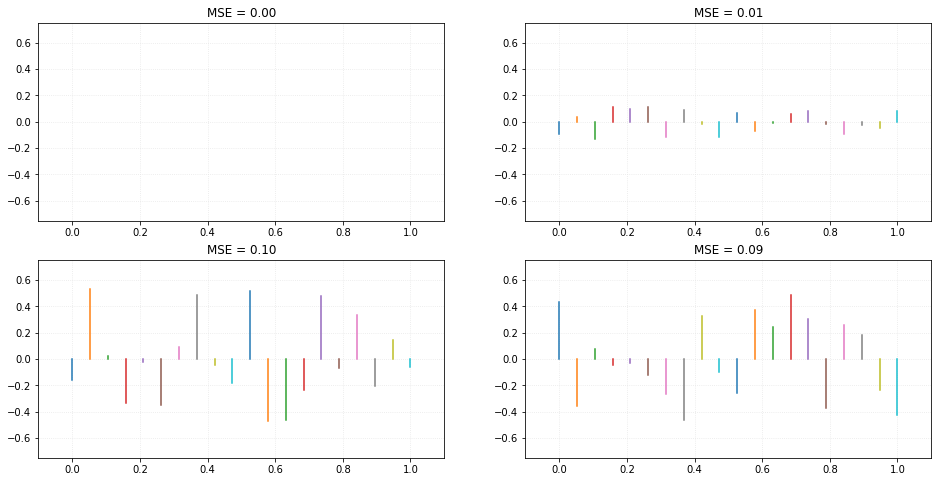

Wall time: 995 ms


In [8]:
%%time
def cellPlot(ax, x, y, lrs):
    erro = y - lrs.pred(x)
    MSE = (erro**2).sum()/erro.size
    ax.plot([x, x], [erro*0, erro])
    ax.set_title('MSE = {0:.2f}'.format(MSE))
    ax.grid(color = '0.9', linestyle = ':')
    ax.axis([-0.1, 1.1, -0.75, 0.75])

fig, [[axA, axB], [axC, axD]] = plt.subplots(2, 2)

lrs.fit(x, yA)
cellPlot(axA, x, yA, lrs)

lrs.fit(x, yB)
cellPlot(axB, x, yB, lrs)

lrs.fit(x, yC)
cellPlot(axC, x, yC, lrs)

lrs.fit(x, yD)
cellPlot(axD, x, yD, lrs)

fig.savefig('output/regression_linear_residual.png', tight_layout=True)
plt.show()

### 1.2. Multiple
---

In [9]:
class linearRegression_multiple(object):
    def __init__(self):
        self._m = 0
        self._b = 0
    @property
    def m(self):
        return self._m
    @property
    def b(self):
        return self._b[0]
    def fit(self, X, y):
        X = np.array(X).T
        y = np.array(y).reshape(-1, 1)
        X_ = X.mean(axis = 0)
        y_ = y.mean(axis = 0)
        num = ((X - X_)*(y - y_)).sum(axis = 0)
        den = ((X - X_)**2).sum(axis = 0)
        self._m = num/den
        self._b = y_ - (self._m*X_).sum()
    def pred(self, x):
        x = np.array(x).T
        return (self._m*x).sum(axis = 1) + self._b

In [10]:
lrm = linearRegression_multiple()

In [11]:
# Synthetic data 2
M = 10
s, t, x1, x2, y = synthData2(M)
lrm.fit([x1, x2], y)
####################
px, py = s, t
p = lrm.pred([x1, x2])
up = y >= p
down = y < p
pz = p.reshape(M, M)
####################
cmapUp = cm.get_cmap('spring')
cmapDown = cm.get_cmap('winter')

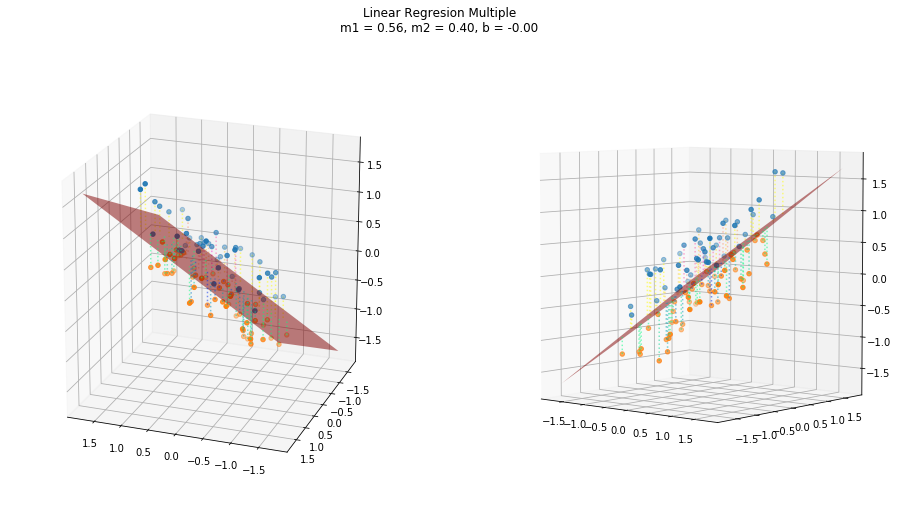

Wall time: 1.23 s


In [12]:
%%time
def cellPlot(ax, m, alt, azi):
    ax.view_init(alt, azi)
    ax.scatter3D(x1[up], x2[up], y[up], zorder = 1)
    for i, j, k, l in zip(x1[up], x2[up], y[up], p[up]):
        ax.plot([i, i], [j, j], [k, l], ':',
                zorder = 2, alpha = 0.5,
                color = cmapUp((i**2 + j**2)**0.5))
    for i, j, k, l in zip(x1[down], x2[down], y[down], p[down]):
        ax.plot([i, i], [j, j], [k, l], ':',
                zorder=5, alpha=0.5,
                color=cmapDown((i**2 + j**2)**0.5))
    ax.scatter3D(x1[down], x2[down], y[down], zorder=4)
    ax.plot_surface(px*m, py*m, pz*m,
                    rstride=M,
                    cstride=M,
                    color='red',
                    alpha=0.5,
                    zorder=3)

fig, (axA, axB) = plt.subplots(1, 2, subplot_kw={'projection': '3d'})
fig.suptitle('Linear Regresion Multiple\nm1 = {0:.2f}, m2 = {1:.2f}, b = {2:.2f}'.format(*lrm.m, lrm.b))

cellPlot(axA, 1.75, 20, -250)
cellPlot(axB, 1.75, 5, -50)

fig.savefig('output/regression_linear_multiple_pred.png', tight_layout=True)
plt.show()

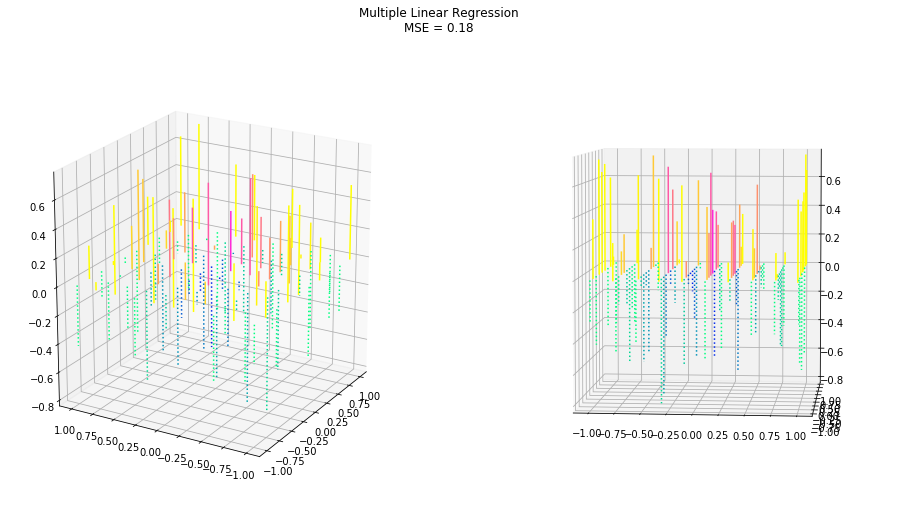

Wall time: 1.11 s


In [13]:
%%time
def cellPlot(ax, x1, x2, y, m, alt, azi):
    ax.view_init(alt, azi)
    error = y - p
    MSE = (error**2).sum()/error.size
    for i, j, e in zip(x1[up], x2[up], error[up]):
        ax.plot([i, i], [j, j], [e*0, e], zorder=1, color=cmapUp((i**2 + j**2)**0.5))
    for i, j, e in zip(x1[down], x2[down], error[down]):
        ax.plot([i, i], [j, j], [e*0, e], ':', zorder=2, color = cmapDown((i**2 + j**2)**0.5))
    fig.suptitle('Multiple Linear Regression\nMSE = {0:.2f}'.format(MSE))

fig, (axA, axB) = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

cellPlot(axA, x1, x2, y, 1.75, 20, -150)
cellPlot(axB, x1, x2, y, 1.75, 5, -85)

fig.savefig('output/regression_linear_multipla_residual.png', tight_layout=True)
plt.show()

### 1.3. Gradient Descent
---

In [14]:
class linearRegression_GD(object):
    def __init__(self,
                 mo = 0,
                 bo = 0,
                 rate = 0.001):
        self._m = mo
        self._b = bo
        self.rate = rate
    @property
    def m(self):
        return self._m
    @property
    def b(self):
        return self._b
    def fit_step(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n = X.size
        dm = (2/n)*np.sum(-x*(y - (self.m*x + self.b)))
        db = (2/n)*np.sum(-(y - (self.m*x + self.b)))
        self._m -= dm*self.rate
        self._b -= db*self.rate
    def pred(self, x):
        x = np.array(x)
        return self._m*x + self._b

In [15]:
%%time
def cellPlot(ax, title='',
             sx='', sy='',
             xlim=[-0.1, 1.1],
             ylim=[-0.5, 1.5],
             leg=True):
    ax.set_title(title)
    ax.grid(color='0.9', linestyle=':')
    ax.axis([*xlim, *ylim])
    ax.set_xlabel(sx)
    ax.set_ylabel(sy)
    if leg:
        ax.legend()

fig, [[axA, axB], [axC, axD]] = plt.subplots(2, 2)

lrs = linearRegression_simple()
lrgd = linearRegression_GD(rate=0.01)

# Synthetic data 3
x, x_, y = synthData3()

lrs.fit(x, y)

B, M, I, E = [], [], [], []
iterations = 3072
nframes = 64
counter = 0
def animation(frame):
    global B, M, I, E, counter
    for i_ in range(48):
        B += [lrgd.b]
        M += [lrgd.m]
        I += [counter]
        error = y - lrgd.pred(x)
        e = np.sum(error**2)/x.size
        E += [e]
        lrgd.fit_step(x, y)
        counter += 1
    i = counter

    axA.cla(); axB.cla(); axC.cla(); axD.cla();
    axA.scatter(x, y, 32, label='data')
    axA.plot(x_, lrs.pred(x_), '--', color='red',
             label='linear regression')
    axA.plot(x_, lrgd.pred(x_), color='green',
             label='gradient descent')
    cellPlot(axA)
    axB.plot([x, x], [error*0, error])
    cellPlot(axB, ylim=[-1, 1], leg = False)
    axC.plot(B, M)
    cellPlot(axC, 'b = {0:.3f}, m = {1:.3f}'.format(lrgd.b, lrgd.m),
             xlim = [-0.5, 0.5],
             sx = 'linear coeficient (b)',
             sy = 'angular coeficient (m)',
             leg = False)
    axD.plot(I, E)
    axD.set_xscale('symlog', nonposx='clip')
    cellPlot(axD, r'iteration = {0:04d}, $\epsilon$ = {1:.4f}'.format(i, e),
             xlim = [0, iterations],
             ylim = [-0.1, 0.6],
             sx = 'iterations (log)',
             sy = 'error',
             leg = False)
    return fig.canvas.draw()

anim = manim.FuncAnimation(fig, animation, frames=nframes, interval=100)
    
anim.save('output/regression_linear_gradDesc.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert output/regression_linear_gradDesc.gif -loop 0 output/regression_linear_gradDesc.gif
! echo GIF exported and reconverted. Disregard any message above.

GIF exported and reconverted. Disregard any message above.
Wall time: 1min 13s


### 1.4. Non-linear Analysis
---

In [16]:
# Synthetic data 4
# Anscombe's quartet
x1, y1, x2, y2, x3, y3, x4, y4 = synthData4()

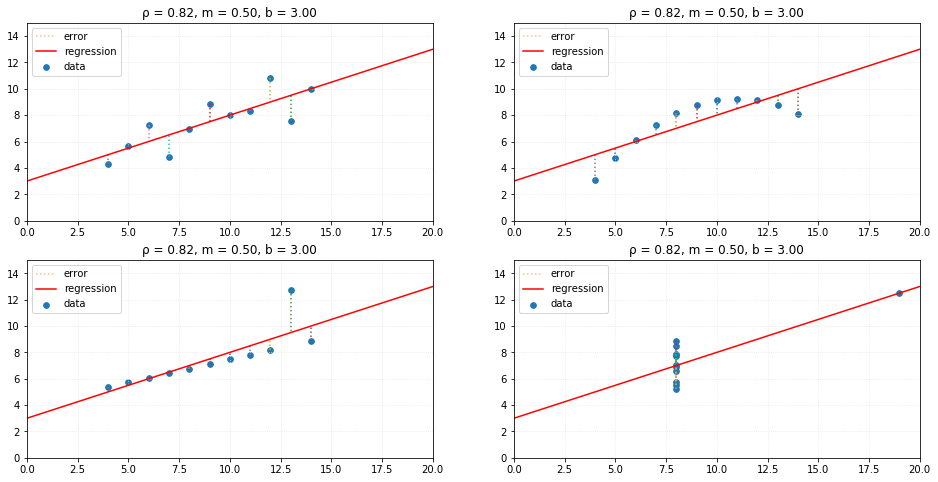

Wall time: 1.01 s


In [17]:
%%time
def cellPlot(ax, x, y, lrs):
    ax.scatter(x, y, 32, label='data')
    ax.plot([x, x], [y, lrs.pred(x)], ':')
    ax.plot(0, 0, ':', alpha=0.5, label='error')
    ax.plot([-50, 50], lrs.pred([-50, 50]), color='red', label='regression')
    ax.set_title('ρ = {0:.2f}, m = {1:.2f}, b = {2:.2f}'.
                 format(correlation(x, y), lrs.m, lrs.b))
    ax.grid(color='0.9', linestyle=':')
    ax.axis([-0, 20, 0, 15])
    ax.legend()

fig, [[axA, axB], [axC, axD]] = plt.subplots(2, 2)

lrs.fit(x1, y1)
cellPlot(axA, x1, y1, lrs)

lrs.fit(x2, y2)
cellPlot(axB, x2, y2, lrs)

lrs.fit(x3, y3)
cellPlot(axC, x3, y3, lrs)

lrs.fit(x4, y4)
cellPlot(axD, x4, y4, lrs)

fig.savefig('output/regression_linear_anscombe_pred.png', tight_layout=True)
plt.show()

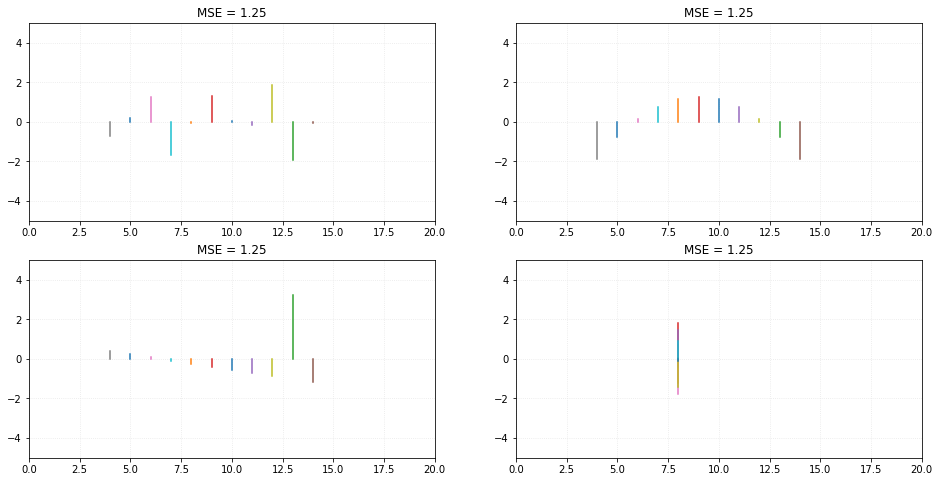

Wall time: 848 ms


In [18]:
%%time
def cellPlot(ax, x, y, lrs):
    error = y - lrs.pred(x)
    MSE = (error**2).sum()/error.size
    ax.plot([x, x], [error*0, error])
    ax.set_title('MSE = {0:.2f}'.format(MSE))
    ax.grid(color='0.9', linestyle=':')
    ax.axis([-0, 20, -5, 5])

fig, [[axA, axB], [axC, axD]] = plt.subplots(2, 2)

lrs.fit(x1, y1)
cellPlot(axA, x1, y1, lrs)

lrs.fit(x2, y2)
cellPlot(axB, x2, y2, lrs)

lrs.fit(x3, y3)
cellPlot(axC, x3, y3, lrs)

lrs.fit(x4, y4)
cellPlot(axD, x4, y4, lrs)

fig.savefig('output/regression_linear_anscombe_residual.png', tight_layout=True)
plt.show()

## 2. Logistic Regression
---

In [19]:
def arraycast(f):
    '''
    Decorator for vectors and matrices cast
    '''
    def wrap(self, *X, y=[]):
        X = np.array(X)
        X = np.insert(X.T, 0, 1, 1)
        if list(y):
            y = np.array(y)[np.newaxis]
            return f(self, X, y)
        return f(self, X)
    return wrap

class logisticRegression(object):
    def __init__(self, rate=0.001, iters=1024):
        self._rate = rate
        self._iters = iters
        self._theta = None
    @property
    def theta(self):
        return self._theta
    def _sigmoid(self, Z):
        return 1/(1 + np.exp(-Z))
    def _dsigmoid(self, Z):
        return self._sigmoid(Z)*(1 - self._sigmoid(Z))
    @arraycast
    def fit(self, X, y=[]):
        self._theta = np.ones((1, X.shape[-1]))
        for i in range(self._iters):
            thetaTx = np.dot(X, self._theta.T)
            h = self._sigmoid(thetaTx)
            delta = h - y.T
            grad = np.dot(X.T, delta).T
            self._theta -= grad*self._rate
    @arraycast
    def pred(self, x):
        return self._sigmoid(np.dot(x, self._theta.T)) > 0.5

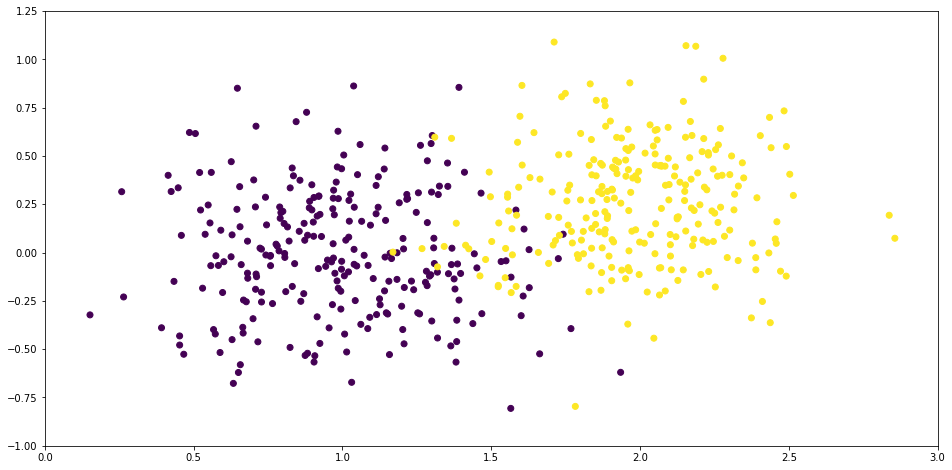

In [20]:
fig, ax = plt.subplots(1, 1)

# Synthetic data 5
x1, x2, y = synthData5()

ax.scatter(x1, x2, c=y)

ax.set_xlim([0, 3])
ax.set_ylim([-1, 1.25])

fig.savefig('output/regression_logistic_data.png', tight_layout=True)
plt.show()

In [21]:
%%time
def cellPlot(ax, titulo='',
             sx='', sy='',
             xlim=[0, 3],
             ylim=[-1, 1.25],
             leg=False):
    ax.set_title(titulo)
    ax.grid(color='0.9', linestyle=':')
    ax.axis([*xlim, *ylim])
    ax.set_xlabel(sx)
    ax.set_ylabel(sy)
    if leg:
        ax.legend()

fig, [axA, axB] = plt.subplots(2, 1)

# Synthetic data 5
x1, x2, y = synthData5()

x_ = np.linspace(-10, 10)

iteracoes = 512
nframes = 64
frames = 1 + np.arange(nframes + 1)*iteracoes//nframes
def animation(frame):
    axA.cla(); axB.cla();
    
    rlogb = logisticRegression(rate=0.001, iters=frames[frame])
    rlogb.fit(x1, x2, y=y)
    w0, w1, w2 = rlogb.theta[0]
    f = lambda x: (- w0 - w1*x)/w2
    
    axA.scatter(x1, x2, c=y)
    axA.plot(x_, f(x_))
    cellPlot(axA)
    
    diff = rlogb.pred(x1, x2).T[0] == y
    axB.scatter(x1[~diff], x2[~diff], c='#DD0033')
    axB.scatter(x1[diff], x2[diff], c='#33AA00')
    axB.plot(x_, f(x_))
    cellPlot(axB)
    
    return fig.canvas.draw()

anim = manim.FuncAnimation(fig, animation, frames=nframes, interval=100)
    
anim.save('output/regression_logistic_gradDesc.gif', writer="imagemagick", extra_args="convert")
plt.close()

# Solve repetition problem
! magick convert output/regression_logistic_gradDesc.gif -loop 0 output/regression_logistic_gradDesc.gif
! echo GIF exported and reconverted. Disregard any message above.

GIF exported and reconverted. Disregard any message above.
Wall time: 41.7 s


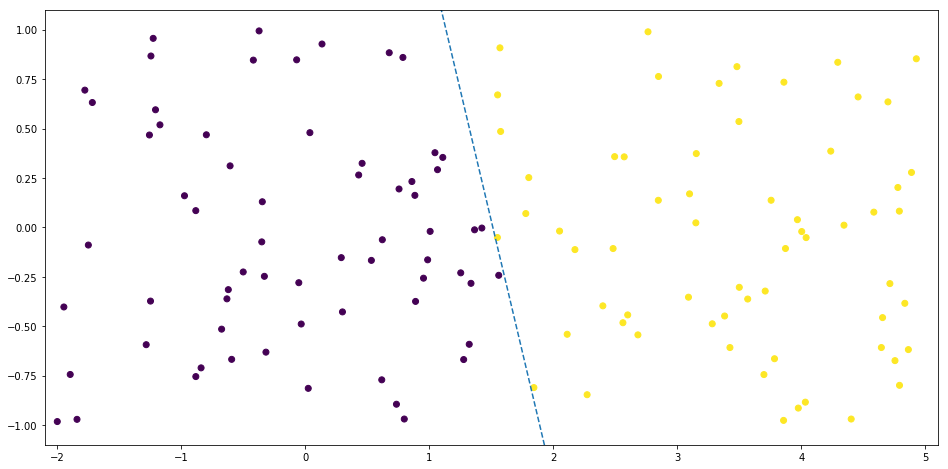

In [22]:
rlogb = logisticRegression(rate=0.001, iters=512)
rlogb.fit(x1, x2, y=y)

w0, w1, w2 = rlogb.theta[0]
f = lambda x: (- w0 - w1*x)/w2

np.random.seed(sum([ord(c) for c in 'Regression']))
X1, X2 = np.random.uniform(-2, 5, 128), np.random.uniform(-1, 1, 128)

Y = rlogb.pred(X1, X2)
plt.scatter(X1, X2, c = Y[:,0])
plt.plot(x_, f(x_), '--')

plt.xlim([-2.1, 5.1])
plt.ylim([-1.1, 1.1])

plt.savefig('output/regression_logistic_pred.png', tight_layout=True)
plt.show()

## 3. Polynomial Regression
---

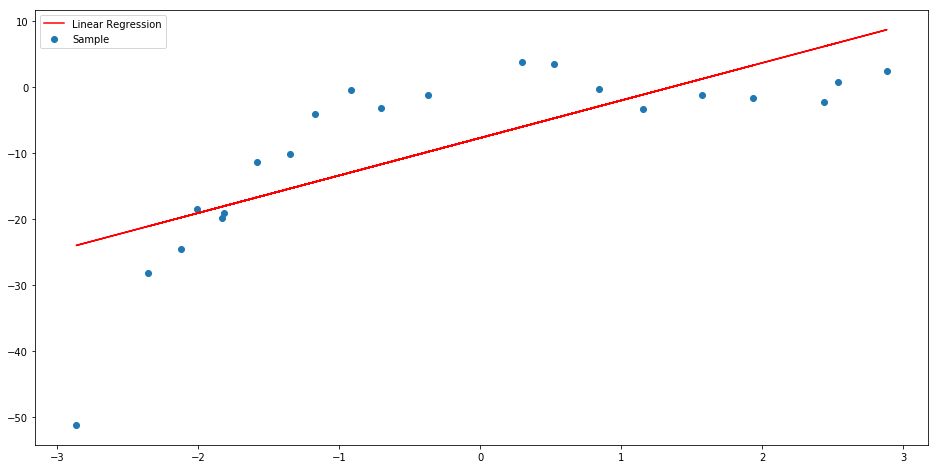

In [23]:
# Synthetic data 6
x, y = synthData6()

lrs = linearRegression_simple()
lrs.fit(x, y)

plt.scatter(x, y, label='Sample')
plt.plot(x, lrs.pred(x), label='Linear Regression', c='red')
plt.legend()

plt.savefig('output/regression_polynomial_linear.png', tight_layout=True)
plt.show()

In [24]:
def arraycast(f):
    '''
    Decorator for vectors and matrices casting
    '''
    def wrap(self, X, y=[]):
        X = np.array(X)
        if list(y):
            y = np.array(y)
            return f(self, X, y)
        return f(self, X)
    return wrap

class polynomialRegression(object):
    def __init__(self, degree=1):
        self._degree = degree
        self._beta = None
    @property
    def beta(self):
        return self._beta
    @arraycast
    def fit(self, X, y=[]):
        V = np.stack([X**i for i in range(self._degree + 1)], axis=0).T
        VTV = np.dot(V.T, V)
        VTV_i = np.linalg.inv(VTV)
        Vi = np.dot(VTV_i, V.T)
        self._beta = np.dot(Vi, y)
    @arraycast
    def pred(self, x):
        V = np.stack([x**i for i in range(self._degree + 1)], axis=0).T
        return np.dot(V, self._beta)

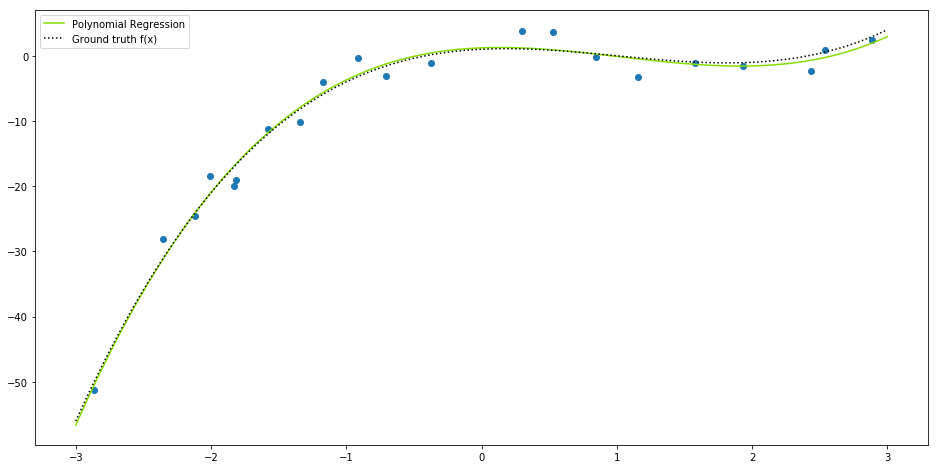

In [25]:
polreg = polynomialRegression(3)
polreg.fit(x, y=y)

X = np.linspace(-3, 3, 101)
plt.scatter(x, y)
plt.plot(X, polreg.pred(X), c='#88DD00', label='Polynomial Regression')
plt.plot(X, X**3 - 3*X**2 + X + 1, ':', c='black', label='Ground truth f(x)')
plt.legend()

plt.savefig('output/regression_polynomial_pred.png')
plt.show()